# Basic Bidding Strategies (5/15 marks for Group Report)

Evaluate the following strategies on the validation set and discuss your results. Use the performance metrics as defined in Section 3.3.

- **Constant bidding (Const)**. Bid a constant value for all the bid requests. The parameter is the specific constant bid price. Explain how you can experimentally find an optimal constant value from the training set. Provide an analysis of your finding.


- **Random bidding (Rand)**. Randomly choose a bid value in a given range. The parameter is the upper bound and lower bound of the random bidding range. Give your experiment results of finding the optimal bounds.

-----

##  SETUP

In [3]:
import os
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import sys
# data directory
DATA_DIR = os.path.join('..', 'Data')

#import utils and strategies
sys.path.append("../Code/")
from utils import performance, new_performance
from strategies import constant_bidding_strategy, random_bidding_strategy 

##  Load data

In [4]:
# load data
train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
validation = pd.read_csv(os.path.join(DATA_DIR, 'validation.csv'))

In [5]:
len(train)

2430981

In [6]:
len(train)/len(validation)

7.998621370403883

In [7]:
train_X = train.drop(['click','bidprice', 'payprice'], axis=1)
train_y = train[['click','bidprice', 'payprice']].copy()

valid_X = validation.drop(['click','bidprice', 'payprice'], axis=1)
valid_y = validation[['click','bidprice', 'payprice']].copy()

del train, validation

## Define performance metrics

- **Click-through rate** - This is the most important metric (the others are just for discussion and comparison)

- **Clicks** - Number of clicked bids

- **Spend** - Total money paid

- **Average CPM** - Cost per mile

- **Average CPC** - Cost per click

## Constant bidding (Const).
Bid a constant value for all the bid requests. The parameter is the specific constant bid price. Explain how you can experimentally find an optimal constant value from the training set. Provide an analysis of your finding.


### Single tests

In [8]:
##### EXAMPLES OF THE CONSTANT BIDDING STRATEGY #####
def test_constant_bidding(y, bid):
    print("Results:")
    bids = constant_bidding_strategy(len(y), bid)
    new_performance(bids, y)

#### Bid low

In [9]:
test_constant_bidding(train_y, 33)

Results:
               CTR: (0.0372)%
        num_clicks: 124
             spend: 6249982 (100.00)%
              aCPM: 4.76490791503
              aCPC: 50.4030806452
num_in_budget_wins: 333262
 ads_within_budget: 1311669


In [12]:
test_constant_bidding(valid_y, 33)

Results:
               CTR: (0.0309)%
        num_clicks: 24
             spend: 1451722 (23.23)%
              aCPM: 4.77657974829
              aCPC: 60.4884166667
num_in_budget_wins: 77564
 ads_within_budget: 303925


#### Bid PayPrice Mean 

In [13]:
test_constant_bidding(train_y, 78)

Results:
               CTR: (0.0563)%
        num_clicks: 82
             spend: 6249960 (100.00)%
              aCPM: 27.3736860547
              aCPC: 76.2190243902
num_in_budget_wins: 145616
 ads_within_budget: 228320


In [14]:
test_constant_bidding(valid_y, 78)

Results:
               CTR: (0.0458)%
        num_clicks: 67
             spend: 6249926 (100.00)%
              aCPM: 27.198306287
              aCPC: 93.2824776119
num_in_budget_wins: 146310
 ads_within_budget: 229791


#### Bid BidPrice Mean 

In [17]:
test_constant_bidding(train_y, 272)

Results:
               CTR: (0.0687)%
        num_clicks: 56
             spend: 6249741 (100.00)%
              aCPM: 76.0299874697
              aCPC: 111.602517857
num_in_budget_wins: 81514
 ads_within_budget: 82201


In [18]:
test_constant_bidding(valid_y, 272)

Results:
               CTR: (0.0637)%
        num_clicks: 52
             spend: 6249862 (100.00)%
              aCPM: 75.8892841965
              aCPC: 120.189653846
num_in_budget_wins: 81622
 ads_within_budget: 82355


#### Bid High

In [19]:
test_constant_bidding(train_y, 300)

Results:
               CTR: (0.0703)%
        num_clicks: 56
             spend: 6249728 (100.00)%
              aCPM: 78.4954345068
              aCPC: 111.602285714
num_in_budget_wins: 79619
 ads_within_budget: 79619


In [20]:
test_constant_bidding(valid_y, 300)

Results:
               CTR: (0.0640)%
        num_clicks: 51
             spend: 6249819 (100.00)%
              aCPM: 78.4197523119
              aCPC: 122.545470588
num_in_budget_wins: 79697
 ads_within_budget: 79697


### Grid Search 

In [21]:
def evaluate_constant_strategy(train_X, train_Y, valid_X, valid_Y, low, high, step=None, shuffle=False):
    start = time.time()
    constant_bids = np.arange(low, high, step)
    vals = pd.DataFrame(constant_bids).reset_index()
    num_clicks = np.zeros_like(constant_bids)
    num_clicks_valid = np.zeros_like(constant_bids)
    
    if shuffle:
        train_X, train_y = shuffle(train_X, train_Y, random_state=0)
        valid_X, valid_y = shuffle(valid_X, valid_Y, random_state=0)

    for i in range(len(constant_bids)): 
        _, c, _, _, _, _, _ = new_performance(constant_bidding_strategy(len(train_X), constant_bids[i]), train_Y, verbose=False)
        _, c_v, _, _, _, _, _ = new_performance(constant_bidding_strategy(len(valid_X), constant_bids[i]), valid_Y, verbose=False)
        num_clicks[i] = c
        num_clicks_valid[i] = c_v
    vals = vals.join(pd.DataFrame({'#Clicks_Train': num_clicks}).reset_index(drop=True))
    vals = vals.join(pd.DataFrame({'#Clicks_Valid': num_clicks_valid}).reset_index(drop=True))               
    
    print("time spent:- {0:.2f} seconds".format(time.time()-start))
    return (constant_bids[np.argmax(num_clicks)], constant_bids[np.argmax(num_clicks_valid)], vals)

In [22]:
train_argmax, valid_argmax, eval_table = evaluate_constant_strategy(train_X, train_y, valid_X, valid_y, 0, 301)

time spent:- 236.19 seconds


In [24]:
eval_table.sort_values(by=['#Clicks_Valid', '#Clicks_Train'], ascending=False).head()

,index,0,#Clicks_Train,#Clicks_Valid
77,77,77,82,68
79,79,79,82,68
78,78,78,82,67
81,81,81,79,67
89,89,89,74,67


In [25]:
eval_table.sort_values(by=['#Clicks_Train', '#Clicks_Valid'], ascending=False).head()

,index,0,#Clicks_Train,#Clicks_Valid
25,25,25,134,16
24,24,24,134,15
23,23,23,132,14
35,35,35,131,24
26,26,26,131,16


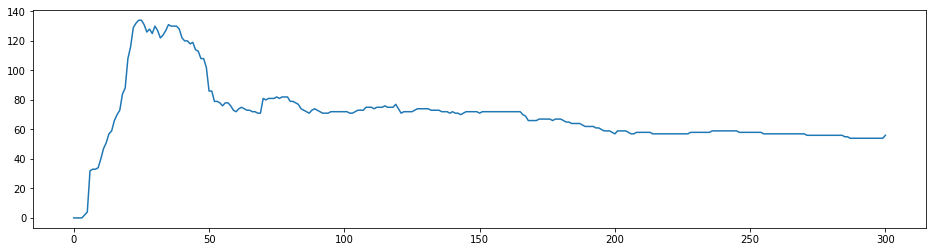

In [26]:
#Plot numclicks- train 
plt.plot(eval_table['index'], eval_table['#Clicks_Train'])
plt.show()

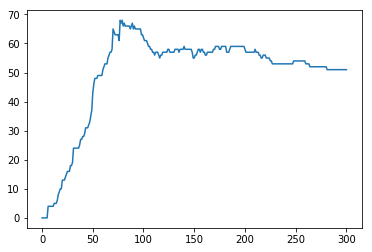

In [27]:
#Plot numclicks valid
plt.plot(eval_table['index'], eval_table['#Clicks_Valid'])
plt.show()

In [28]:
# Test Train argmax Values as Parameter
test_constant_bidding(train_y, train_argmax)

Results:
               CTR: (0.0325)%
        num_clicks: 134
             spend: 6249981 (100.00)%
              aCPM: 2.91240665708
              aCPC: 46.6416492537
num_in_budget_wins: 411909
 ads_within_budget: 2145985


In [29]:
# Test Train argmax Values as Parameter
test_constant_bidding(valid_y, train_argmax)

Results:
               CTR: (0.0255)%
        num_clicks: 15
             spend: 893006 (14.29)%
              aCPM: 2.93824463272
              aCPC: 59.5337333333
num_in_budget_wins: 58778
 ads_within_budget: 303925


In [30]:
# Test Valid argmax Values as Parameter
test_constant_bidding(train_y, valid_argmax)

Results:
               CTR: (0.0561)%
        num_clicks: 82
             spend: 6249931 (100.00)%
              aCPM: 27.1586167638
              aCPC: 76.2186707317
num_in_budget_wins: 146125
 ads_within_budget: 230127


In [31]:
# Test Valid argmax Values as Parameter
test_constant_bidding(valid_y, valid_argmax)

Results:
               CTR: (0.0463)%
        num_clicks: 68
             spend: 6249942 (100.00)%
              aCPM: 26.9731215744
              aCPC: 91.9109117647
num_in_budget_wins: 146863
 ads_within_budget: 231710


#Comment
If we superimpose the 2 graphs - > Optimal value would be around the avg payprice . This would result in performing OK on both datasets. Shuffling the data may show different results

### Shuffled

In [45]:
shuffled_train_argmax, shuffled_valid_argmax, shuffled_eval_table = evaluate_constant_strategy(train_X, train_y, valid_X, valid_y, 0, 301, True)



time spent:- 209.01 seconds


In [46]:
shuffled_eval_table.sort_values(by=['#Clicks_Valid', '#Clicks_Train'], ascending=False).head()

,index,0,#Clicks_Train,#Clicks_Valid
77,77,77,82,68
79,79,79,82,68
78,78,78,82,67
81,81,81,79,67
89,89,89,74,67


In [47]:
shuffled_eval_table.sort_values(by=['#Clicks_Train', '#Clicks_Valid'], ascending=False).head()

,index,0,#Clicks_Train,#Clicks_Valid
25,25,25,134,16
24,24,24,134,15
23,23,23,132,14
35,35,35,131,24
26,26,26,131,16


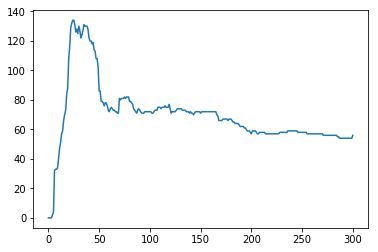

In [48]:
#Plot numclicks- train 
plt.plot(shuffled_eval_table['index'], shuffled_eval_table['#Clicks_Train'])
plt.show()

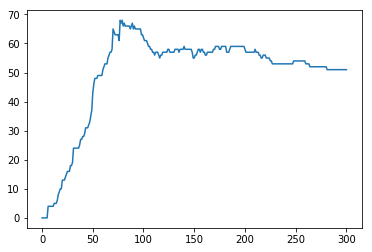

In [49]:
#Plot numclicks valid
plt.plot(shuffled_eval_table['index'], shuffled_eval_table['#Clicks_Valid'])
plt.show()

In [50]:
# Test Train argmax Values as Parameter
test_constant_bidding(train_y, shuffled_train_argmax)

Results:
               CTR: (0.0325)%
        num_clicks: 134
             spend: 6249981 (100.00)%
              aCPM: 2.912406657082878
              aCPC: 46641
num_in_budget_wins: 411909
 ads_within_budget: 2145985


In [51]:
# Test Train argmax Values as Parameter
test_constant_bidding(valid_y, shuffled_train_argmax)

Results:
               CTR: (0.0255)%
        num_clicks: 15
             spend: 893006 (14.29)%
              aCPM: 2.9382446327218887
              aCPC: 59533
num_in_budget_wins: 58778
 ads_within_budget: 303925


In [52]:
# Test Valid argmax Values as Parameter
test_constant_bidding(train_y, shuffled_valid_argmax)

Results:
               CTR: (0.0561)%
        num_clicks: 82
             spend: 6249931 (100.00)%
              aCPM: 27.158616763786952
              aCPC: 76218
num_in_budget_wins: 146125
 ads_within_budget: 230127


In [53]:
# Test Valid argmax Values as Parameter
test_constant_bidding(valid_y, shuffled_valid_argmax)

Results:
               CTR: (0.0463)%
        num_clicks: 68
             spend: 6249942 (100.00)%
              aCPM: 26.97312157438177
              aCPC: 91910
num_in_budget_wins: 146863
 ads_within_budget: 231710


## Random bidding (Rand).
Randomly choose a bid value in a given range. The parameter is the upper bound and lower bound of the random bidding range. Give your experiment results of finding the optimal bounds.


In [55]:
def evaluate_random_strategy(train_X, train_Y, valid_X, valid_Y, low, high, step=None, randomType='uniform', shuffle=False):
    start = time.time()
    constant_bids = np.arange(low, high, step)
    num_clicks = np.zeros(shape=(constant_bids.shape[0],constant_bids.shape[0]), dtype=int)
    num_clicks_valid = np.zeros(shape=(constant_bids.shape[0],constant_bids.shape[0]), dtype=int)
    params = {'lower': [constant_bids[l] for l in range(len(constant_bids)) for u in range(len(constant_bids))],
            'upper' : [constant_bids[u] for l in range(len(constant_bids)) for u in range(len(constant_bids))]}
    vals = pd.DataFrame(params).reset_index(drop=True)
    
    if shuffle:
        train_X, train_y = shuffle(train_X, train_Y, random_state=0)
        valid_X, valid_y = shuffle(valid_X, valid_Y, random_state=0)

    for lower in range(0, len(constant_bids)-1):
        for upper in range(lower + 1, len(constant_bids)):
            _, c, _, _, _, _, _  = new_performance(random_bidding_strategy(len(train_X), min_bet=constant_bids[lower], max_bet=constant_bids[upper], distribution=randomType), train_Y, verbose=False)
            _, c_v, _, _, _, _, _  = new_performance(random_bidding_strategy(len(valid_X), min_bet=constant_bids[lower], max_bet=constant_bids[upper], distribution=randomType), valid_Y, verbose=False)
            num_clicks[lower, upper] = c
            num_clicks_valid[lower, upper] = c_v
    vals = vals.join(pd.DataFrame({'n_clicks_train': [num_clicks[l, u] for l in range(len(constant_bids)) for u in range(len(constant_bids))]}).reset_index(drop=True))
    vals = vals.join(pd.DataFrame({'n_clicks_valid': [num_clicks_valid[l, u] for l in range(len(constant_bids)) for u in range(len(constant_bids))]}).reset_index(drop=True))               
    best_train_lower, best_train_upper = np.unravel_index(num_clicks.argmax(), num_clicks.shape)
    best_valid_lower, best_valid_upper = np.unravel_index(num_clicks_valid.argmax(), num_clicks_valid.shape)
    
    print("time spent:- {0:.2f} seconds".format(time.time()-start))
    return (constant_bids[best_train_lower], constant_bids[best_train_upper], constant_bids[best_valid_lower], constant_bids[best_valid_upper], vals, num_clicks_valid)


In [56]:
##### EXAMPLES OF THE CONSTANT BIDDING STRATEGY #####
def test_random_bidding(y, lower=0, upper=300, mean=78, std=59, distribution='uniform'):
    print("Results:")
    if distribution == 'uniform':
        bids = random_bidding_strategy(len(y), min_bet=lower, max_bet=upper, distribution="uniform")
    else:
        bids = random_bidding_strategy(len(y), mean=mean, std=std, distribution="normal")
    new_performance(bids, y)

#### Uniform Random Bidding Strategy

### Single Tests

In [54]:
num_clicks_valid

NameError: name 'num_clicks_valid' is not defined

In [34]:
test_random_bidding(train_y)

Results:
               CTR: (0.0657)%
        num_clicks: 66
             spend: 6249966 (100.00)%
              aCPM: 46.0029883704
              aCPC: 94.6964545455
num_in_budget_wins: 100510
 ads_within_budget: 135860


In [40]:
test_random_bidding(train_y, lower=68, upper=100)

Results:
               CTR: (0.0533)%
        num_clicks: 74
             spend: 6249957 (100.00)%
              aCPM: 29.97250663
              aCPC: 84.4588783784
num_in_budget_wins: 138912
 ads_within_budget: 208523


In [36]:
test_random_bidding(valid_y)

Results:
               CTR: (0.0564)%
        num_clicks: 57
             spend: 6249873 (100.00)%
              aCPM: 45.7916474338
              aCPC: 109.646894737
num_in_budget_wins: 101035
 ads_within_budget: 136485


In [41]:
test_random_bidding(valid_y, lower=68, upper=100)

Results:
               CTR: (0.0509)%
        num_clicks: 71
             spend: 6249927 (100.00)%
              aCPM: 29.7934787272
              aCPC: 88.0271408451
num_in_budget_wins: 139592
 ads_within_budget: 209775


### Grid Search

In [57]:
best_train_lower, best_train_upper, best_valid_lower, best_valid_upper, eval_table, clicks = evaluate_random_strategy(train_X, train_y, valid_X, valid_y, 0, 301, 5)

time spent:- 1649.53 seconds


In [81]:
best_valid_lower, best_valid_upper

(20, 115)

In [43]:
eval_table.sort_values(by=['n_clicks_train', 'n_clicks_valid'], ascending=False).head()

,lower,upper,n_clicks_train,n_clicks_valid
130,10,40,142,17
191,15,40,136,16
250,20,30,134,15
435,35,40,132,25
374,30,40,131,23


In [44]:
eval_table.sort_values(by=['n_clicks_valid', 'n_clicks_train'], ascending=False).head()

,lower,upper,n_clicks_train,n_clicks_valid
27,0,135,66,79
206,15,115,75,78
271,20,135,82,77
94,5,165,75,77
87,5,130,77,76


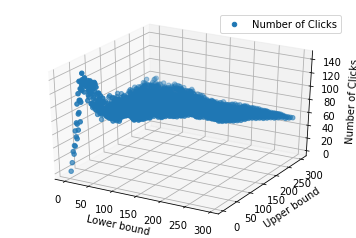

In [45]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10
new_table = eval_table[eval_table['n_clicks_train'] > 0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_table['lower'], new_table['upper'], new_table['n_clicks_train'], label='Number of Clicks')
ax.set_xlabel('Lower bound')
ax.set_ylabel('Upper bound')
ax.set_zlabel('Number of Clicks')
ax.legend()

plt.show()


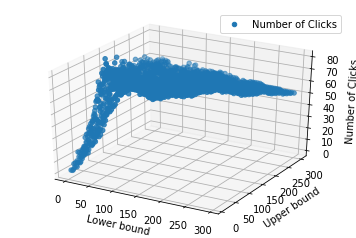

In [46]:

mpl.rcParams['legend.fontsize'] = 10
new_table = eval_table[eval_table['n_clicks_valid'] > 0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_table['lower'], new_table['upper'], new_table['n_clicks_valid'], label='Number of Clicks')
ax.set_xlabel('Lower bound')
ax.set_ylabel('Upper bound')
ax.set_zlabel('Number of Clicks')
ax.legend()

plt.show()

In [57]:
test_random_bidding(train_y, lower=best_train_lower, upper=best_train_upper)

Results:
               CTR: (0.0344)%
        num_clicks: 126
             spend: 6249990 (100.00)%
              aCPM: 2.9760482492
              aCPC: 49603
num_in_budget_wins: 366434
 ads_within_budget: 2100097


In [58]:
test_random_bidding(valid_y, lower=best_train_lower, upper=best_train_upper)

Results:
               CTR: (0.0357)%
        num_clicks: 19
             spend: 906469 (14.50)%
              aCPM: 2.9825417455
              aCPC: 47708
num_in_budget_wins: 53178
 ads_within_budget: 303925


In [59]:
test_random_bidding(train_y, lower=best_valid_lower, upper=best_valid_upper)

Results:
               CTR: (0.0491)%
        num_clicks: 75
             spend: 6249940 (100.00)%
              aCPM: 20.6450568653
              aCPC: 83332
num_in_budget_wins: 152887
 ads_within_budget: 302733


In [101]:
test_random_bidding(valid_y, lower=best_valid_lower, upper=best_valid_upper)

Results:
               CTR: (0.0463)%
        num_clicks: 72
             spend: 6249920 (100.00)%
              aCPM: 20.5689612048
              aCPC: 86.8044444444
num_in_budget_wins: 155633
 ads_within_budget: 303852


#### Normal Random Bidding Strategy

In [70]:
def evaluate_random_normal_strategy(train_X, train_Y, valid_X, valid_Y, mean_range, std_range, shuffle=False):
    start = time.time()
    
    num_clicks = np.zeros(shape=(mean_range.shape[0],std_range.shape[0]), dtype=int)
    num_clicks_valid = np.zeros(shape=(mean_range.shape[0],std_range.shape[0]), dtype=int)
    params = {'mean': [mean_range[m] for m in range(len(mean_range)) for s in range(len(std_range))],
              'std' : [std_range[s] for m in range(len(mean_range)) for s in range(len(std_range))]}
    vals = pd.DataFrame(params).reset_index(drop=True)
    
    if shuffle:
        train_X, train_y = shuffle(train_X, train_Y, random_state=0)
        valid_X, valid_y = shuffle(valid_X, valid_Y, random_state=0)

    for mean in range(len(mean_range)):
        for std in range(len(std_range)):
            _, c, _, _, _, _, _  = new_performance(random_bidding_strategy(len(train_X), mean=mean_range[mean], std=std_range[std], distribution='normal'), train_Y, verbose=False)
            _, c_v, _, _, _, _, _  = new_performance(random_bidding_strategy(len(valid_X), mean=mean_range[mean], std=std_range[std], distribution='normal'), valid_Y, verbose=False)
            num_clicks[mean, std] = c
            num_clicks_valid[mean, std] = c_v
    vals = vals.join(pd.DataFrame({'n_clicks_train': [num_clicks[m, s] for m in range(len(mean_range)) for s in range(len(std_range))]}).reset_index(drop=True))
    vals = vals.join(pd.DataFrame({'n_clicks_valid': [num_clicks_valid[m, s] for m in range(len(mean_range)) for s in range(len(std_range))]}).reset_index(drop=True))               
    best_train_mean, best_train_std = np.unravel_index(num_clicks.argmax(), num_clicks.shape)
    best_valid_mean, best_valid_std = np.unravel_index(num_clicks_valid.argmax(), num_clicks_valid.shape)
    
    print("time spent:- {0:.2f} seconds".format(time.time()-start))
    return (mean_range[best_train_mean], std_range[best_train_std], mean_range[best_valid_mean], std_range[best_valid_std], vals, num_clicks_valid)

### Single Tests

In [64]:
test_random_bidding(train_y, distribution='normal')

Results:
               CTR: (0.0613)%
        num_clicks: 79
             spend: 6249937 (100.00)%
              aCPM: 25.9272163845
              aCPC: 79113
num_in_budget_wins: 128926
 ads_within_budget: 241057


In [65]:
test_random_bidding(valid_y, distribution='normal')

Results:
               CTR: (0.0457)%
        num_clicks: 59
             spend: 6249959 (100.00)%
              aCPM: 25.8931496634
              aCPC: 105931
num_in_budget_wins: 129137
 ads_within_budget: 241375


### Grid Search

In [72]:
mean_range = np.linspace(0, 300, 50)
std_range = np.linspace(0, 100, 50)
best_train_mean, best_train_std, best_valid_mean, best_valid_std, eval_table_rn, clicks_rn= evaluate_random_normal_strategy(train_X, train_y, valid_X, valid_y, mean_range, std_range)



time spent:- 2197.49 seconds


In [82]:
best_valid_mean, best_valid_std

(61.224489795918366, 59.183673469387756)

In [83]:
eval_table_rn.sort_values(by=['n_clicks_train', 'n_clicks_valid'], ascending=False).head()

,mean,std,n_clicks_train,n_clicks_valid
204,24.489796,8.163265,142,18
202,24.489796,4.081633,136,14
201,24.489796,2.040816,135,16
200,24.489796,0.000000,134,15
253,30.612245,6.122449,131,23


In [84]:
eval_table_rn.sort_values(by=['n_clicks_valid', 'n_clicks_train'], ascending=False).head()

,mean,std,n_clicks_train,n_clicks_valid
529,61.224490,59.183673,77,78
717,85.714286,34.693878,82,77
491,55.102041,83.673469,70,76
874,104.081633,48.979592,77,75
766,91.836735,32.653061,75,75


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


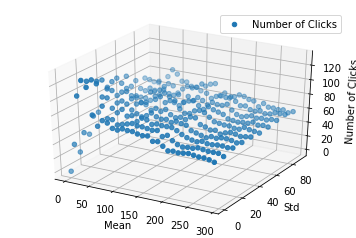

In [69]:
mpl.rcParams['legend.fontsize'] = 10
new_table = eval_table_rn[eval_table['n_clicks_train'] > 0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eval_table_rn['mean'], eval_table_rn['std'], eval_table_rn['n_clicks_train'], label='Number of Clicks')
ax.set_xlabel('Mean')
ax.set_ylabel('Std')
ax.set_zlabel('Number of Clicks')
ax.legend()

plt.show()


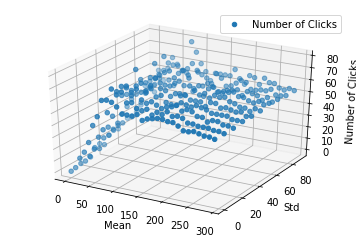

In [71]:

mpl.rcParams['legend.fontsize'] = 10
new_table = eval_table[eval_table['n_clicks_valid'] > 0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eval_table_rn['mean'], eval_table_rn['std'], eval_table_rn['n_clicks_valid'], label='Number of Clicks')
ax.set_xlabel('Mean')
ax.set_ylabel('Std')
ax.set_zlabel('Number of Clicks')
ax.legend()

plt.show()

In [72]:
test_random_bidding(train_y, mean=best_train_mean, std=best_train_std, distribution='normal')

Results:
               CTR: (0.0605)%
        num_clicks: 78
             spend: 6249885 (100.00)%
              aCPM: 25.9235593495
              aCPC: 80126
num_in_budget_wins: 128927
 ads_within_budget: 241089


In [85]:
test_random_bidding(valid_y, mean=best_train_mean, std=best_train_std, distribution='normal')

Results:
               CTR: (0.0479)%
        num_clicks: 62
             spend: 6249899 (100.00)%
              aCPM: 25.7371188786
              aCPC: 100804
num_in_budget_wins: 129491
 ads_within_budget: 242836


In [80]:
test_random_bidding(train_y, mean=best_valid_mean, std=best_valid_std, distribution='normal')

Results:
               CTR: (0.0611)%
        num_clicks: 79
             spend: 6249918 (100.00)%
              aCPM: 25.7760465212
              aCPC: 79112
num_in_budget_wins: 129263
 ads_within_budget: 242470


In [98]:
test_random_bidding(valid_y, mean=best_valid_mean, std=best_valid_std, distribution='normal')

Results:
               CTR: (0.0534)%
        num_clicks: 73
             spend: 6249846 (100.00)%
              aCPM: 20.615940308
              aCPC: 85.6143287671
num_in_budget_wins: 136768
 ads_within_budget: 303156


In [97]:
test_random_bidding(valid_y, mean=best_valid_mean, std=best_valid_std, distribution='normal')

Results:
               CTR: (0.0447)%
        num_clicks: 61
             spend: 6234377 (99.75)%
              aCPM: 20.5128798223
              aCPC: 102.202901639
num_in_budget_wins: 136322
 ads_within_budget: 303925


### Extra - WIP

In [111]:
def plot_budget_graph(bids, true_y, budget=6250*1000):
        #--- Combine data in to one dataframe ------
    data = true_y.copy()
    data['bid'] = bids
    
    #--- Work out which bids were successful ---
    #> if they are greater than payprice
    won_bid = data.payprice <= data.bid 
    
    #--- Only keep bids that are within budget -
    success_bids_csum = np.cumsum(np.array(data.payprice) * won_bid)

    #--- prior budget check 
    prior_success_bids_csum = ([0] + list(success_bids_csum))[:len(success_bids_csum)]
    new_budget = np.repeat(budget, len(success_bids_csum)) - prior_success_bids_csum
    
    #--- in budget 
    in_budget_bids = (success_bids_csum <= np.repeat(budget, len(success_bids_csum))) & (np.array(data.bid) <= new_budget)
    in_budget_wins = won_bid & in_budget_bids
    
    spend_csum = success_bids_csum*in_budget_bids
    plt.plot(spend_csum[:spend_csum.argmax()+1])
    plt.show()
    
    return 

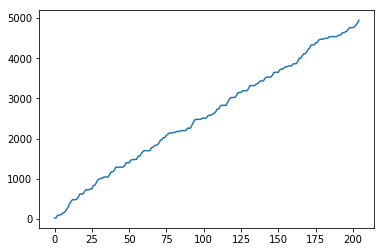

In [114]:
spend = plot_budget_graph(random_bidding_strategy(len(valid_y), min_bet=50, max_bet=100), valid_y, budget=5000)

In [48]:
#meshgrid(x,y,z)
b = np.meshgrid(eval_table[['lower', 'upper', 'n_clicks_valid']])

In [53]:
from matplotlib import mesh

ImportError: cannot import name 'mesh'

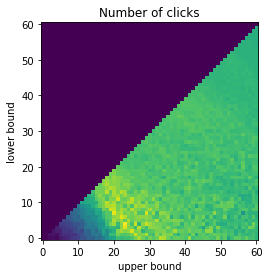

In [63]:
import matplotlib.pyplot as plt
# Display accuracies
fig = plt.figure(figsize=plt.figaspect(0.25))

ax = fig.add_subplot(1, 1, 1)
ax.set_title("Number of clicks")
ax.set_xlabel("upper bound")
ax.set_ylabel("lower bound")
#plt.xticks
plt.imshow(clicks, cmap='viridis', origin='lower')
plt.MaxNLocator(100)
plt.show()

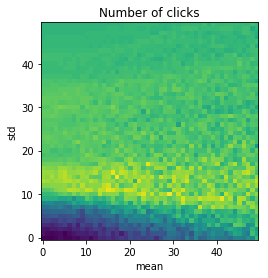

In [74]:
import matplotlib.pyplot as plt
# Display accuracies
fig = plt.figure(figsize=plt.figaspect(0.25))

ax = fig.add_subplot(1, 1, 1)
ax.set_title("Number of clicks")
ax.set_xlabel("mean")
ax.set_ylabel("std")
#plt.xticks
plt.imshow(clicks_rn, cmap='viridis', origin='lower')
plt.MaxNLocator(100)
plt.show()

In [79]:
mean_r = np.linspace(0, 100, 50)

In [80]:
mean_r[::10]

array([  0.        ,  20.40816327,  40.81632653,  61.2244898 ,  81.63265306])